<a href="https://colab.research.google.com/github/sayantikag98/Depression_Analysis/blob/master/Depression_analysis_from_tweets_(Model_Building).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [3]:
import pandas as pd
df_combined=pd.read_csv('drive/My Drive/pre_final1.csv',parse_dates=['date'],encoding='utf-8')

In [4]:
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"['Andrew', 'do', 'send', 'me', 'a', 'copy', '!...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"['This', 'is', 'all', 'coming', 'true', '.', '...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"['Wishing', 'everyone', 'a', 'very', 'happy', ...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","['I', 'don', '’', 't', 'usually', 'approach', ...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"['#', 'GunjanSaxena', 'is', 'such', 'a', 'bril...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266472,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","['I', 'stand', 'corrected', '.', 'there', 'is'...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266473,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"['#', 'iWant', '!', 'RT', '@', '24HoursLoot', ...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266474,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"['there', ""'s"", 'a', 'vaccine', '?', 'do', ""n'...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266475,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesomeness,"['#', 'nowplaying', 'gareth', 'emery', '-', 'e...",nowplay gareth emeri exposur awesom,nowplaying gareth emery exposure awesomeness


In [5]:
df_combined.shape[0]-df_combined.stemming_stopwordsRemoved.isna().sum()    ### to check for the number of non-null rows according to a particular column

266329

In [6]:
df_combined.lemmatized_stopwordsRemoved.isna().sum()    ### to check for the number of null rows

148

In [7]:
df_combined.dropna(subset=['stemming_stopwordsRemoved'],inplace=True)    ### to drop the rows containing null values

In [8]:
df_combined.reset_index(inplace=True,drop=True)
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"['Andrew', 'do', 'send', 'me', 'a', 'copy', '!...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"['This', 'is', 'all', 'coming', 'true', '.', '...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"['Wishing', 'everyone', 'a', 'very', 'happy', ...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","['I', 'don', '’', 't', 'usually', 'approach', ...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"['#', 'GunjanSaxena', 'is', 'such', 'a', 'bril...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266324,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","['I', 'stand', 'corrected', '.', 'there', 'is'...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266325,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"['#', 'iWant', '!', 'RT', '@', '24HoursLoot', ...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266326,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"['there', ""'s"", 'a', 'vaccine', '?', 'do', ""n'...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266327,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesomeness,"['#', 'nowplaying', 'gareth', 'emery', '-', 'e...",nowplay gareth emeri exposur awesom,nowplaying gareth emery exposure awesomeness


In [9]:
df_combined.stemming_stopwordsRemoved.isna().sum()     ### final check on null value rows

0

In [10]:
df_combined.lemmatized_stopwordsRemoved.isna().sum()

0

In [11]:
sentences=df_combined.stemming_stopwordsRemoved.tolist()     ### to convert a particular column into a list

In [12]:
sentences1=df_combined.lemmatized_stopwordsRemoved.tolist()

# **BAG OF WORDS**

In [13]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(max_features=2500)
# X1=cv.fit_transform(sentences).toarray()   ### for stemming
# X1   ### array of features

In [14]:
# print(cv.get_feature_names())  ### to get the feature names      ###### for stemming
# print(cv.get_params())

In [15]:
# df_bow=pd.DataFrame(X1,columns=cv.get_feature_names())
# df_bow

In [16]:
# X1_1=cv.fit_transform(sentences1).toarray()    ### for lemmatization
# X1_1

In [17]:
# print(cv.get_feature_names())  ### for lemmatization

In [18]:
# X1.shape

# **TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY**

In [19]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf=TfidfVectorizer(max_features=1000)
# X2=tfidf.fit_transform(sentences).toarray()     ### for stemming
# X2   ### array of features

In [20]:
# print(tfidf.get_feature_names())   ### to get the feature names

In [21]:
# X2_1=tfidf.fit_transform(sentences1).toarray()    ### lemmatization
# X2_1

In [22]:
# print(tfidf.get_feature_names())

# **WORD2VEC**

In [23]:
from gensim.models import Word2Vec
import re
from nltk.corpus import stopwords

In [24]:
senten=[]

In [25]:
for i in range(len(df_combined.text)):
  words=re.sub("[^A-Za-z]"," ",df_combined.text[i])
  words=words.lower()
  senten.append(words)

In [37]:
senten_1=[]

for i in range(len(senten)):
  words=[]
  for word in senten[i].split():
    if (word not in set (stopwords.words('english'))):  
      words.append(word)
  senten_1.append(list(words))


In [39]:
nltk.word_tokenize(senten[7])

['please', 'say', 'something', 'for', 'amaal', 'mallik', 'askshreya']

In [40]:
senten_1[7]

['please', 'say', 'something', 'amaal', 'mallik', 'askshreya']

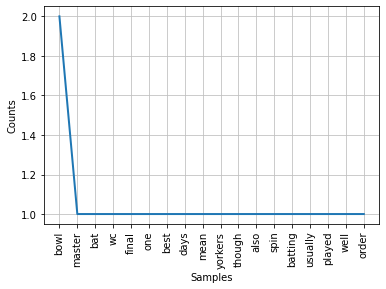

In [45]:
count_plot=nltk.FreqDist(senten_1[10])
count_plot.plot()

In [46]:
## Training the Word2Vec model
model=Word2Vec(senten_1,min_count=5)



In [50]:
word=model.wv.vocab
#word

In [51]:
## to find the vector for a particular word
vector=model.wv['depression']
vector

array([ 0.68043035,  0.01049844, -0.46485877,  0.5807302 , -0.12374185,
       -0.75990134, -0.25537646,  0.00419424,  0.10576321, -0.5044135 ,
        0.30075896, -0.44033286, -0.70646906, -0.6772808 , -0.14589737,
        0.5096586 , -0.168075  , -0.20308338, -1.017044  ,  0.8577469 ,
       -0.30610508, -0.34639868,  0.34742394, -0.5392344 , -0.55708027,
        0.2002801 ,  0.47399867, -0.3186919 , -0.12359994,  0.5802101 ,
        0.5607315 ,  0.35867468,  0.78525084, -0.18282484,  0.13571271,
        0.16769563,  0.00675667, -0.42687413,  0.04714834, -0.12268312,
        0.23362514,  0.3017155 ,  0.27204007,  0.39862564,  0.2444659 ,
        0.1709637 ,  0.31873807,  0.32477212, -0.0264409 ,  0.39900407,
        0.5638017 , -0.09636617,  0.35698822,  0.20662932,  0.07618102,
       -0.67296445,  0.2035227 ,  0.14253621,  0.0075208 ,  0.11811877,
        0.2624364 ,  0.10124448, -0.13934103, -0.13951659, -0.3074161 ,
        0.15923199, -0.49224266,  0.63529456, -0.08137842,  0.48

In [60]:
## to find similar words
keyword = ["depression","depressed","anxiety","overwhelmed","exhausted","distressed","anxious","tired","low","discouraged","desperate","insomnia","cry","nervous","worried","lonely","sad","empty"]

### word "demotivated" is not there in the dictionary

similar=[]
for i in keyword:
  similar.append(model.wv.most_similar(i))


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [82]:
import itertools
merged = list(itertools.chain.from_iterable(similar))
mergedList=list(set (merged))
print(len(mergedList))

180


In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier